In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lesson2/training.csv


In [3]:
df = pd.read_csv('/kaggle/input/lesson2/training.csv')
del df['Unnamed: 0']
df

,gender,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,profession,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
0,F,1,0,1,1,1,44,1216.55,Student,56.820000,5.09,6,6
1,M,1,0,1,1,1,58,218.00,Artist,1045.570000,5.23,3,6
2,F,0,0,0,1,1,66,545.09,Retired,235.770000,0.00,0,9
3,M,0,0,0,1,1,35,499.92,Manager,543.144975,0.00,0,6
4,F,0,0,0,1,0,0,59.39,Retired,485.420000,0.00,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256026,F,0,1,0,1,1,56,434.78,Retired,619.885024,0.00,0,5
256027,M,1,1,1,0,1,61,134.10,Retired,466.559493,2.05,3,0
256028,M,0,1,1,1,0,0,926.33,Teacher,1446.570000,3.68,0,3
256029,F,0,0,0,1,1,50,155.37,Retired,264.980000,0.00,0,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256031 entries, 0 to 256030
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gender                       226383 non-null  object 
 1   antivirus                    256031 non-null  int64  
 2   multirum                     256031 non-null  int64  
 3   tv_paket                     256031 non-null  int64  
 4   is_active_jan_2018           256031 non-null  int64  
 5   is_active_jan_2019           256031 non-null  int64  
 6   months_active_on_jan_2019    256031 non-null  int64  
 7   avg_revenue_per_month        256031 non-null  float64
 8   profession                   256031 non-null  object 
 9   gb_incoming_outgoung         256031 non-null  float64
 10  tv_hours_per_day             256031 non-null  float64
 11  virus_count_per_year         256031 non-null  int64  
 12  num_of_support_interactions  256031 non-null  int64  
dtyp

In [5]:
df.describe()

,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
count,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000
mean,0.601083,0.499209,0.402088,0.949975,0.768094,385.595389,514.083129,681.725715,1.608682,3.617160,4.820947
std,0.489676,0.500000,0.490320,0.217997,0.422050,1844.131347,1275.326103,729.644282,2.060977,4.131541,2.572850
min,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-5000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,19.000000,173.580000,180.680000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,45.000000,459.750000,463.050000,0.000000,2.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,957.315000,925.215000,3.690000,7.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10310.180000,12960.510000,8.090000,12.000000,10.000000


In [6]:
df['months_active_on_jan_2019'] = np.where(
    (df['months_active_on_jan_2019'] < 0) | (df['months_active_on_jan_2019'] > 120),
    np.nan, df['months_active_on_jan_2019']
)

In [7]:
df['months_active_on_jan_2019'].isna().sum()

21250

In [8]:
df['months_active_on_jan_2019'] = df['months_active_on_jan_2019'].fillna(df['months_active_on_jan_2019'].median())

In [9]:
df['months_active_on_jan_2019'].isna().sum()

0

In [12]:
df.describe()

,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
count,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000
mean,0.601083,0.499209,0.402088,0.949975,0.768094,38.545543,514.083129,681.725715,1.608682,3.617160,4.820947
std,0.489676,0.500000,0.490320,0.217997,0.422050,23.706102,1275.326103,729.644282,2.060977,4.131541,2.572850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,173.580000,180.680000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,44.000000,459.750000,463.050000,0.000000,2.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,957.315000,925.215000,3.690000,7.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,10310.180000,12960.510000,8.090000,12.000000,10.000000


In [13]:
#Now I replce outliers in [['avg_revenue_per_month', 'gb_incoming_outgoung']]
for col in df[['avg_revenue_per_month', 'gb_incoming_outgoung']]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l = q1 - 1.5 * iqr
    u = q3 + 1.5 * iqr
    df[col] = np.where((df[col] < l) | (df[col] > u), np.nan, df[col])

In [14]:
df.describe()

,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
count,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,234189.000000,241767.000000,256031.000000,256031.000000,256031.000000
mean,0.601083,0.499209,0.402088,0.949975,0.768094,38.545543,592.927717,554.570627,1.608682,3.617160,4.820947
std,0.489676,0.500000,0.490320,0.217997,0.422050,23.706102,505.745358,482.637660,2.060977,4.131541,2.572850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,186.400000,167.690000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,44.000000,449.050000,429.190000,0.000000,2.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,877.100000,814.130000,3.690000,7.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,2132.810000,2041.920000,8.090000,12.000000,10.000000


In [15]:
for col in df[['avg_revenue_per_month', 'gb_incoming_outgoung']]:
    df[col] = df[col].fillna(df[col].median())

In [16]:
df.describe()

,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
count,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000
mean,0.601083,0.499209,0.402088,0.949975,0.768094,38.545543,580.653512,547.585421,1.608682,3.617160,4.820947
std,0.489676,0.500000,0.490320,0.217997,0.422050,23.706102,485.358804,469.881448,2.060977,4.131541,2.572850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,207.245000,180.680000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,44.000000,449.050000,429.190000,0.000000,2.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,823.930000,781.080000,3.690000,7.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,2132.810000,2041.920000,8.090000,12.000000,10.000000


In [17]:
df.gender.isna().sum()

29648

In [18]:
df.gender.value_counts()

gender
M      110934
F      110825
???      4624
Name: count, dtype: int64

In [19]:
train_df = df[df.gender.isin(['F', 'M'])]
X = train_df.drop(columns = ['gender'])
y = train_df['gender']
X = pd.get_dummies(X, drop_first = True)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49594155844155846
              precision    recall  f1-score   support

           F       0.50      0.41      0.45     22239
           M       0.50      0.58      0.54     22113

    accuracy                           0.50     44352
   macro avg       0.50      0.50      0.49     44352
weighted avg       0.50      0.50      0.49     44352



In [28]:
corr = df.select_dtypes(include = 'number').corrwith(df['gender'].map({'F': 1, 'M': 0}))
print(corr.sort_values(ascending = False))

is_active_jan_2018             0.003671
months_active_on_jan_2019      0.002549
gb_incoming_outgoung           0.001594
multirum                       0.000283
antivirus                      0.000161
avg_revenue_per_month          0.000006
is_active_jan_2019            -0.000068
virus_count_per_year          -0.000691
num_of_support_interactions   -0.001500
tv_paket                      -0.002872
tv_hours_per_day              -0.003310
dtype: float64


In [29]:
predict_df = df[df['gender'].isna() | ~df['gender'].isin(['M', 'F'])]
X_predict = pd.get_dummies(predict_df.drop(columns = ['gender']), drop_first = True)
X_predict = X_predict.reindex(columns = X.columns, fill_value = 0)
predictions = model.predict(X_predict)
df.loc[predict_df.index, 'gender'] = predictions

In [31]:
df.gender.value_counts().sum()

256031

In [38]:
def select_binary_columns(df):
    bin_cols = []
    for col in df.select_dtypes(include = 'number'):
        if df[col].min() == 0 and df[col].max() == 1:
            bin_cols.append(col)
    return bin_cols

In [39]:
bin_cols = select_binary_columns(df)
bin_cols

['antivirus',
 'multirum',
 'tv_paket',
 'is_active_jan_2018',
 'is_active_jan_2019']

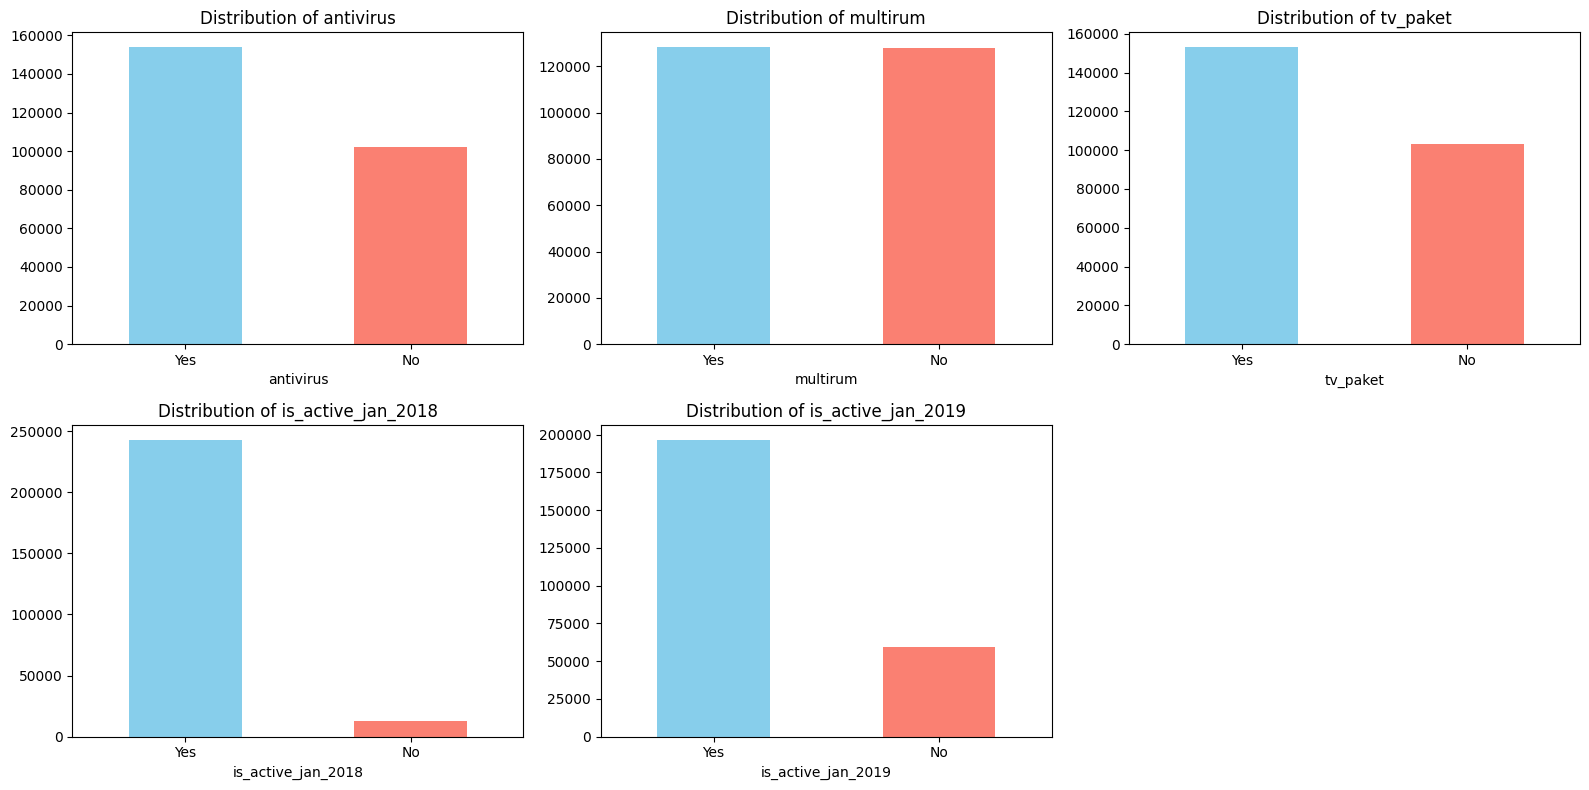

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 8))
for i, col in enumerate(bin_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
    plt.title(f"Distribution of {col}")
    plt.xticks([0, 1], ['Yes', 'No'], rotation = 0)
plt.tight_layout()

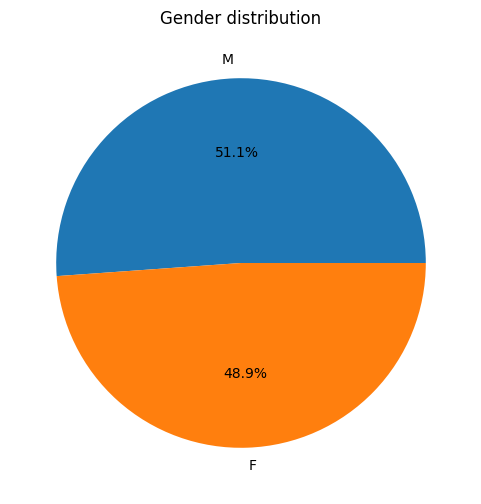

In [47]:
plt.figure(figsize = (6, 6))
df.gender.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Gender distribution')
plt.ylabel('')
plt.show()

Text(0, 0.5, '')

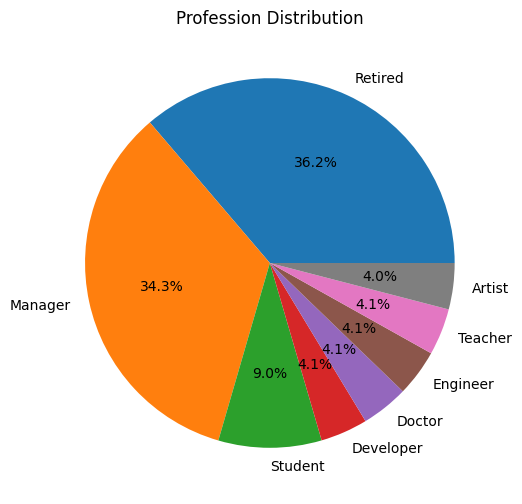

In [51]:
plt.figure(figsize = (6, 6))
df['profession'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Profession Distribution')
plt.ylabel('')

In [52]:
def ncols(df):
    ncols = []
    for col in df.select_dtypes(include = 'number'):
        if df[col].min() == 0 and df[col].max() == 1:
            continue
        ncols.append(col)
    return ncols

In [53]:
num_cols = ncols(df)
num_cols

['months_active_on_jan_2019',
 'avg_revenue_per_month',
 'gb_incoming_outgoung',
 'tv_hours_per_day',
 'virus_count_per_year',
 'num_of_support_interactions']

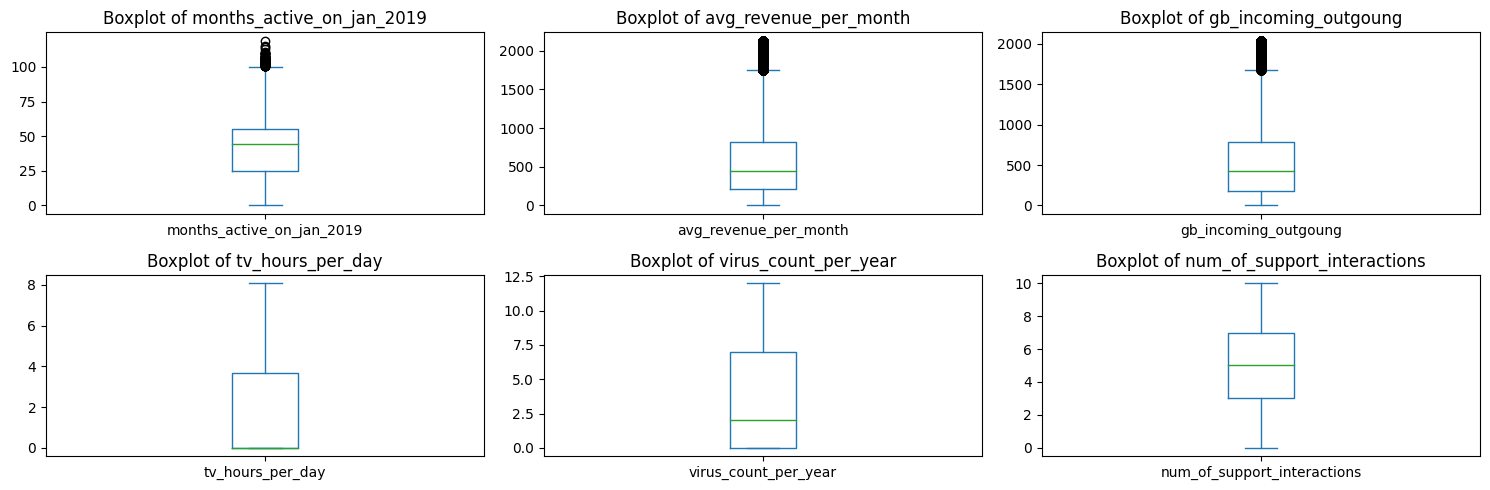

In [57]:
plt.figure(figsize = (15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    df[col].plot(kind = 'box')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

Text(0, 0.5, 'Average Revenue')

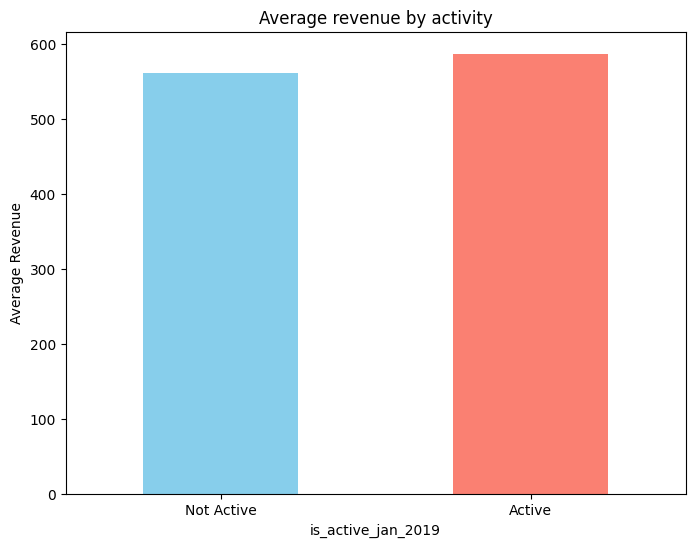

In [58]:
plt.figure(figsize = (8, 6))
df.groupby('is_active_jan_2019')['avg_revenue_per_month'].mean().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Average revenue by activity')
plt.xticks([0, 1], ['Not Active', 'Active'], rotation = 0)
plt.ylabel('Average Revenue')

In [60]:
num_stats = df[num_cols].describe().transpose()
bin_stats = pd.DataFrame({
    'Feature': bin_cols,
    'Yes(%)': [df[col].mean()*100 for col in bin_cols],
    'No(%)': [(1-df[col].mean())*100 for col in bin_cols]
})
print("Numerical Feature Summary:")
print(num_stats)
print("\nBinary Feature Summary")
print(bin_stats)

Numerical Feature Summary:
                                count        mean         std  min      25%  \
months_active_on_jan_2019    256031.0   38.545543   23.706102  0.0   25.000   
avg_revenue_per_month        256031.0  580.653512  485.358804  0.0  207.245   
gb_incoming_outgoung         256031.0  547.585421  469.881448  0.0  180.680   
tv_hours_per_day             256031.0    1.608682    2.060977  0.0    0.000   
virus_count_per_year         256031.0    3.617160    4.131541  0.0    0.000   
num_of_support_interactions  256031.0    4.820947    2.572850  0.0    3.000   

                                50%     75%      max  
months_active_on_jan_2019     44.00   55.00   119.00  
avg_revenue_per_month        449.05  823.93  2132.81  
gb_incoming_outgoung         429.19  781.08  2041.92  
tv_hours_per_day               0.00    3.69     8.09  
virus_count_per_year           2.00    7.00    12.00  
num_of_support_interactions    5.00    7.00    10.00  

Binary Feature Summary
          